<a href="https://colab.research.google.com/github/paulanavarretec/WineRec/blob/master/WineRec_Training_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import library
import pandas as pd

#Read both train and test files into separate data structures
train_file = pd.read_csv('train_70.csv',
                         sep=',',
                         names = ['user_id','item_id','ts',
                                  'vintage',
                                  'type_encoded',
                                  'producer_encoded',
                                  'variety_encoded',
                                  'designation_encoded',
                                  'vineyard_encoded',
                                  'country_encoded',
                                  'region_encoded',
                                  'subregion_encoded',
                                  'appellation_encoded',
                                  'rating'
                                 ],
                         header=0)

In [2]:
print(train_file.head())
print(train_file.tail(),'\n\n')

   user_id  item_id                   ts  vintage  type_encoded  \
0     4198     3026  1293148800000000000     2001             2   
1     1235      629  1423094400000000000     2010            10   
2     3271     3941  1339718400000000000     2007             2   
3     1093     2133  1187395200000000000     2005             2   
4     4934     2937  1243382400000000000     2006            10   

   producer_encoded  variety_encoded  designation_encoded  vineyard_encoded  \
0               694              180                  963                 0   
1               889               70                    9                 0   
2               300              194                    9                 0   
3               449              221                  927                 0   
4               294              236                  301                 0   

   country_encoded  region_encoded  subregion_encoded  appellation_encoded  \
0                1              39          

Let's get some stats out of the sample. The following code gets the total number of unique instances for each column, i.e. how many different users, items, styles, rating, brewerID and timestamps there are:

In [3]:
print(train_file.nunique())

user_id                4486
item_id                3469
ts                     4216
vintage                  24
type_encoded             15
producer_encoded       1022
variety_encoded         244
designation_encoded    1142
vineyard_encoded        106
country_encoded           4
region_encoded           88
subregion_encoded        46
appellation_encoded     338
rating                   44
dtype: int64


This is nice because we have a large sample, compounded by many items and users, we have more users than items (as spected) but it would be nicer if there were more. 
We have almost 45 different ratings. We guess they accumulate arround a mean and some calfications are missing (ratings below 60 for example, there are no such bad wines to get below that score).

#Summary statistics
Now, let's take a deeper look into de shape of the data, to do that, we use different statistic functions provided by pandas library. It is important to notice that the overall mean rating is 87 points and the lowest 25% of the ratings are below 86 and the highest 25% of the ratings are above 89.

In [4]:
train_file['rating'].describe()

count    11023.000000
mean        86.939581
std          4.247554
min         50.000000
25%         86.000000
50%         88.000000
75%         89.000000
max        100.000000
Name: rating, dtype: float64

In [6]:
train_file['rating'].var()

18.041713016117647

In [7]:
train_file['rating'].std()

4.247553768478705

Skewness is a measure for symmetry, and encompases the lack of it. Any symmetric data should have a skewness near zero: negative values indicate data that are skewed left and positive values for the skewness indicate data that are skewed right. By skewed left, we mean that the left tail is long relative to the right tail and the skewness of our data refects this.

In [8]:
# Get Skewness of rating values
train_file['rating'].skew()

-2.890270392182034

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution wich has a kurtosis of zero. Data sets with high kurtosis (positive values) tend to have heavy tails, or outliers and data sets with low kurtosis (negative valueas) tend to have light tails, or lack of outliers.

In [9]:
train_file['rating'].kurt()

15.310107904285408

All characteristics mentioned can also be seen in the folowing figure. We can appreciate the ratings are biased towards 85 points, and they tend to accumulate around it

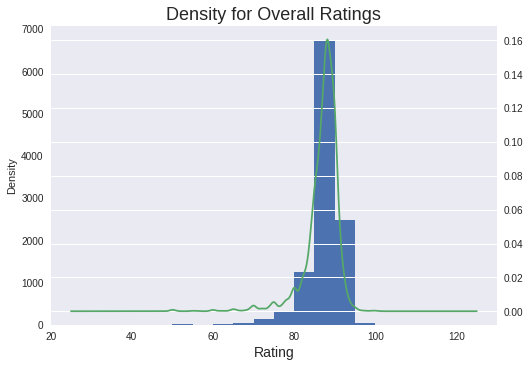

In [10]:
# Rating density plot

ax = train_file.rating.plot(kind='hist')
ax.set_title('Density for Overall Ratings', fontsize=18)
ax.set_xlabel('Rating', fontsize=14)

train_file.rating.plot(kind='kde', ax=ax, secondary_y=True)

#Dataset Density

Now, let's see all these tendencies we've resumed in the numbers just examined. First we plot the density function of the user ratings. The following plot depicts the frecuency for the y-axis of reviews per user and a probability density function.

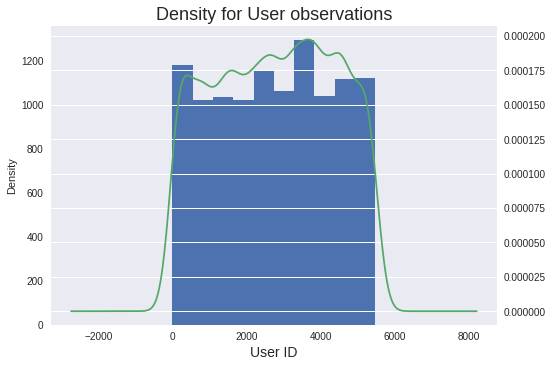

In [13]:
ax = train_file.user_id.plot(kind='hist')
ax.set_title('Density for User observations', fontsize=18)
ax.set_xlabel('User ID', fontsize=14)

train_file.user_id.plot(kind='kde', ax=ax, secondary_y=True)

In [22]:
train_file.user_id.value_counts().describe()

count    4486.000000
mean        2.457200
std         5.234294
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       261.000000
Name: user_id, dtype: float64

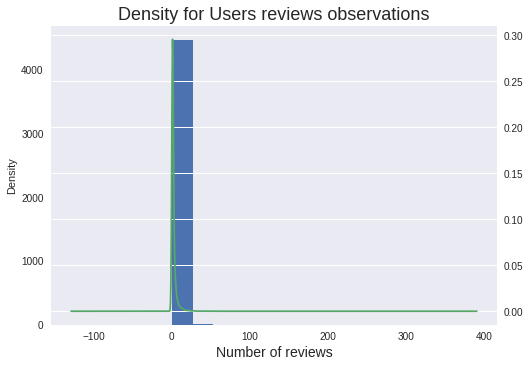

In [31]:
ax = train_file.user_id.value_counts().plot(kind='hist') # just to obtain the ax
ax.set_title('Density for Users reviews observations', fontsize=18)
ax.set_xlabel('Number of reviews', fontsize=14)
#ax.set_xticks(range(0, 50), minor=False)
train_file.user_id.value_counts().plot(kind='kde', ax=ax, secondary_y=True)


In [30]:
train_file.item_id.value_counts().describe()

count    3469.000000
mean        3.177573
std         5.921162
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       128.000000
Name: item_id, dtype: float64

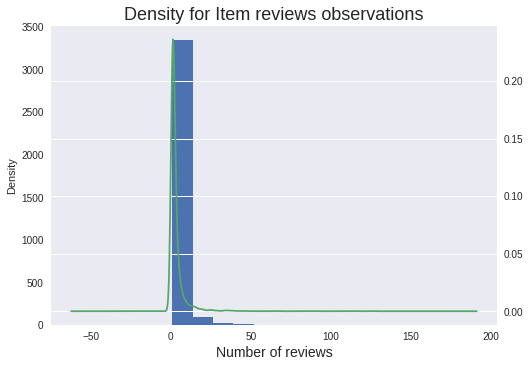

In [33]:
ax = train_file.item_id.value_counts().plot(kind='hist') # just to obtain the ax
ax.set_title('Density for Item reviews observations', fontsize=18)
ax.set_xlabel('Number of reviews', fontsize=14)
#ax.set_xticks(range(0, 50), minor=False)
train_file.item_id.value_counts().plot(kind='kde', ax=ax, secondary_y=True)